In [37]:
import os

print(os.getcwd())

C:\Users\kumar\University of Hartford\Robotics


In [38]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [39]:
!cd yolov5 & pip install -r requirements.txt

     ---------------------------------------- 1.1/1.1 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.1.0
    Uninstalling setuptools-58.1.0:
      Successfully uninstalled setuptools-58.1.0



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [41]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\kumar/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-28 Python-3.9.9 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [42]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [43]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data data.yaml --weights yolov5s.pt --workers 2

wandb: WARNING  wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\kumar\University': No such file or directory
YOLOv5  2023-2-9 Python-3.9.9 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)

hyperparameters: l

In [54]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\kumar/.cache\torch\hub\master.zip
requirements: YOLOv5 requirement "setuptools>=65.5.1" not found, attempting AutoUpdate...

requirements: 1 package updated per C:\Users\kumar\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2023-2-9 Python-3.9.9 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [63]:
img = os.path.join("train", "images", "frame_1416.jpg")
results = model(img)
results.print()

image 1/1: 1024x1280 1 intersection
Speed: 10.0ms pre-process, 47.6ms inference, 1.0ms NMS per image at shape (1, 3, 512, 640)


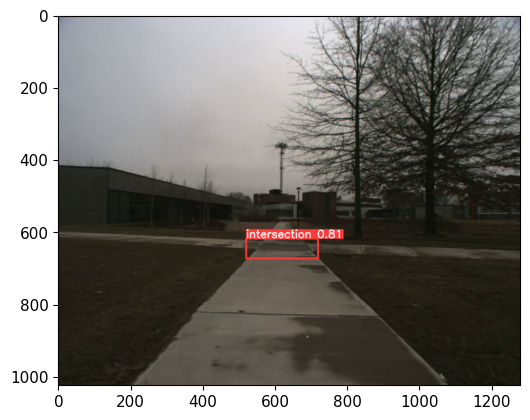

In [64]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()